In [1]:
%matplotlib inline
import matplotlib
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18) 

import numpy as np 
import matplotlib.pyplot as plt 
from WeakLensingLib import WeakLensingLib as WL
from pk2cl import pk2cl

Data loaded


/Users/mohammed/anaconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


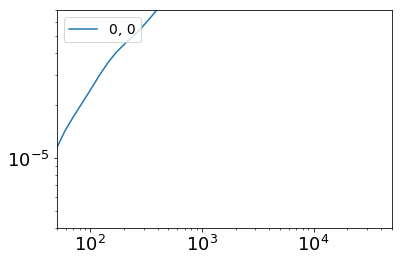

Class is initialised
Data loaded


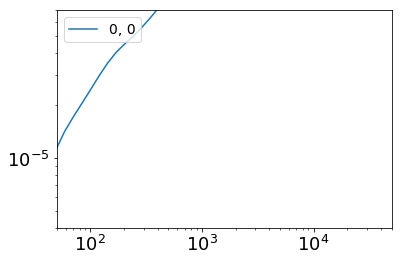

Class is initialised
Data loaded


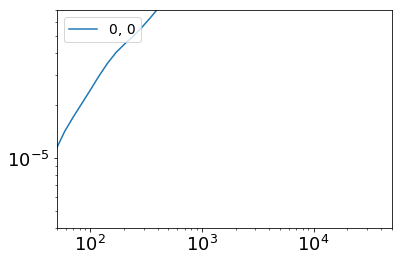

Class is initialised
Data loaded


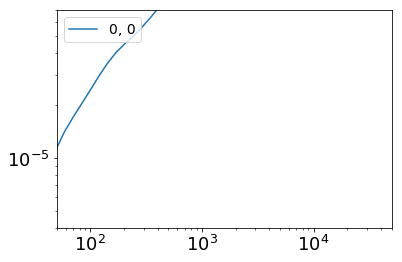

Class is initialised
Data loaded


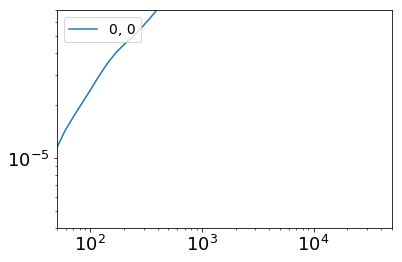

Class is initialised


In [2]:
obj = pk2cl(nbins_z=1, nn=1)
obj1 = pk2cl(nbins_z=1, nn=10)
obj2 = pk2cl(nbins_z=1, nn=2)
# obj3 = pk2cl(nbins_z=1, nn=3)
obj4 = pk2cl(nbins_z=1, nn=4)
obj5 = pk2cl(nbins_z=1, nn=5)
# obj6 = pk2cl(nbins_z=1, nn=6)
# obj7 = pk2cl(nbins_z=1, nn=7)
# obj8 = pk2cl(nbins_z=1, nn=8)
# obj9 = pk2cl(nbins_z=1, nn=9)

(1, 1, 40)


/Users/mohammed/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:3179: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


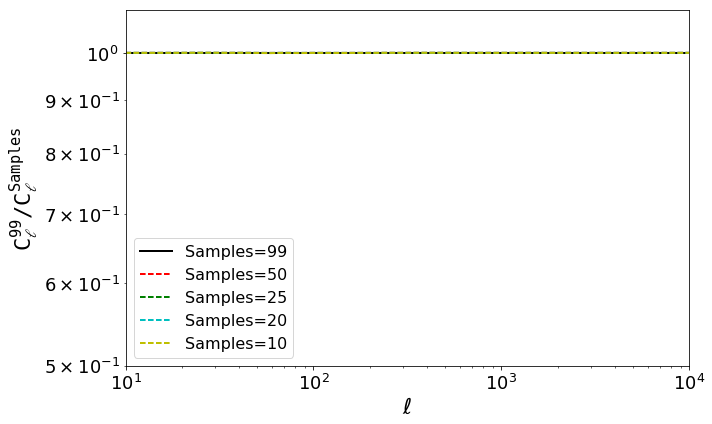

In [3]:
print obj.CellArray.shape

plt.figure(figsize=(10,6))
for i in range(obj.NumberOfBins):
    for j in range(i, obj.NumberOfBins):
        if i==j:
            ls = '-'
        else:
            ls='--'
        plt.loglog(obj.ellArray, obj.CellArray[i,j,:]/obj.CellArray[i,j,:], 'k', lw=2, label='Samples=%i'%obj.nsamples)
        plt.loglog(obj.ellArray, obj.CellArray[i,j,:]/obj2.CellArray[i,j,:], '--r', lw=2, label='Samples=%i'%obj2.nsamples)
#         plt.loglog(obj.ellArray, obj.CellArray[i,j,:]/obj3.CellArray[i,j,:], 'g', lw=2, label='Samples=%i'%obj3.nsamples)
        plt.loglog(obj.ellArray, obj.CellArray[i,j,:]/obj4.CellArray[i,j,:], '--g', lw=2, label='Samples=%i'%obj4.nsamples)
        plt.loglog(obj.ellArray, obj.CellArray[i,j,:]/obj5.CellArray[i,j,:], '--c', lw=2, label='Samples=%i'%obj5.nsamples)
#         plt.loglog(obj.ellArray, obj.CellArray[i,j,:]/obj6.CellArray[i,j,:], lw=2, label='Samples=%i'%obj6.nsamples)
#         plt.loglog(obj.ellArray, obj.CellArray[i,j,:]/obj7.CellArray[i,j,:], lw=2, label='Samples=%i'%obj7.nsamples)
#         plt.loglog(obj.ellArray, obj.CellArray[i,j,:]/obj8.CellArray[i,j,:], lw=2, label='Samples=%i'%obj8.nsamples)
#         plt.loglog(obj.ellArray, obj.CellArray[i,j,:]/obj9.CellArray[i,j,:], lw=2, label='Samples=%i'%obj9.nsamples)
        plt.loglog(obj.ellArray, obj.CellArray[i,j,:]/obj1.CellArray[i,j,:], '--y', lw=2, label='Samples=%i'%obj1.nsamples)
plt.legend(loc=3, fontsize=16)        
plt.xlabel('$\ell$', fontsize=22)
plt.ylabel('$\mathtt{C_{\ell}^{99}/C_{\ell}^{Samples}}$', fontsize=22)
plt.xlim(10,10000)
plt.ylim(0.5, 1.1)
plt.tight_layout()
plt.savefig('finding_n_pk2cl.eps')

In [ ]:
kk = 10**np.linspace(-3,1,1000)
zz = np.linspace(0.2, 5.0, 101)
ki = np.linspace(1000, 5000, 1000)
ell = 10**np.linspace(1, 4, 100)

In [ ]:
plt.figure(figsize=(10,6))
for i in range(0, len(zz), 3):
    pk = obj.Func_pkmatrix(zz[i], kk)
    plt.loglog(kk, pk, 'k', lw=0.5)
    
plt.xlabel('$\mathtt{k\ [h/Mpc]}$', fontsize=22)
plt.ylabel('$\mathtt{P(k)\ [Mpc/h]^3}$', fontsize=22)

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(zz, obj.Func_z2ki(zz), 'r', lw=2)
plt.plot(obj.Func_ki2z(ki), ki, '--b', lw=2)
for i in range(len(obj.binedges_z)):
    plt.axvline(x=obj.binedges_z[i], color='k', ls=':')
    plt.axhline(y=obj.binedges_ki[i], color='k', ls=':')
plt.xlabel('$\mathtt{z\ [Redshift]}$', fontsize=22)
plt.ylabel('$\mathtt{\chi\ [ComovingDistance]}$', fontsize=22)

In [ ]:
plt.figure(figsize=(10,6))
for i in range(obj.NumberOfBins):
    plt.plot(obj.zArray, obj.qMatrix[:,i], label='$\mathtt{Bin: %i}$'%i)
plt.legend(loc=1, fontsize=18)
for i in range(len(obj.binedges_z)):
    plt.axvline(x=obj.binedges_z[i], color='k', ls=':')
    
plt.xlabel('$\mathtt{z\ [Redshift]}$', fontsize=22)
plt.ylabel('$\mathtt{q(z)\ [LensingKernel]}$', fontsize=22)

In [ ]:
print obj.CellArray.shape

plt.figure(figsize=(10,6))
for i in range(obj.NumberOfBins):
    for j in range(i, obj.NumberOfBins):
        if i==j:
            ls = '-'
        else:
            ls='--'
        plt.loglog(obj.ellArray, obj.CellArray[i,j,:]*obj.ellArray*(obj.ellArray+1)/2.0/np.pi, \
            ls=ls, label='%i, %i'%(i,j))                        
plt.xlabel('$\ell$', fontsize=22)
plt.ylabel('$\mathtt{\ell(\ell+1)C_{\ell} / 2\pi}$', fontsize=22)
plt.xlim(50,50000)
plt.ylim(4e-6, 7e-5)

In [ ]:
plt.figure(figsize=(12,8))


for i in range(len(ell)):
    plt.semilogy(zz, ell[i]/obj.Func_z2ki(zz), 'c', lw=0.5)
    
for i in range(len(obj.binedges_z)):
    plt.axvline(x=obj.binedges_z[i], color='k', ls=':')
    
plt.semilogy(zz, 1000.0/obj.Func_z2ki(zz), 'b', lw=2, label='$\mathtt{\ell=1000}$')
plt.semilogy(zz, 5000.0/obj.Func_z2ki(zz), 'm', lw=2, label='$\mathtt{\ell=5000}$')
plt.semilogy(zz, 10000.0/obj.Func_z2ki(zz), 'Orange', lw=2, label='$\mathtt{\ell=10000}$')
    
plt.axhline(y=1.0, color='k', lw=0.5)
plt.axhline(y=2*np.pi, color='k', lw=0.5)
plt.axhline(y=2*np.pi/200.0, color='k', lw=0.5)

plt.xlabel('$\mathtt{z\ [Redshift]}$', fontsize=22)
plt.ylabel('$\mathtt{k\ [h/Mpc]}$', fontsize=22)
plt.legend(loc=1, fontsize=18)
plt.savefig('k_z_ell1.eps')

In [ ]:
plt.figure(figsize=(12,8))

ell = 10**np.linspace(1, 4, 100)

for i in range(0, len(kk),10):
    plt.semilogy(zz, kk[i]*obj.Func_z2ki(zz), 'c', lw=0.5)
for i in range(len(obj.binedges_z)):
    plt.axvline(x=obj.binedges_z[i], color='k', ls=':')
    
plt.semilogy(zz, 0.01*obj.Func_z2ki(zz), 'b', lw=2, label='$\mathtt{k=0.01}$')
plt.semilogy(zz, 1.0*obj.Func_z2ki(zz), 'm', lw=2, label='$\mathtt{k=1.0}$')
plt.semilogy(zz, 10.0*obj.Func_z2ki(zz), 'Orange', lw=2, label='$\mathtt{k=10}$')
    
plt.axhline(y=10.0, color='k', lw=0.5)
plt.axhline(y=1000.0, color='k', lw=0.5)
plt.axhline(y=10000, color='k', lw=0.5)

plt.xlabel('$\mathtt{z\ [Redshift]}$', fontsize=22)
plt.ylabel('$\mathtt{\ell}$', fontsize=22)
plt.legend(loc=4, fontsize=18)
plt.savefig('k_z_ell2.eps')